In [8]:
import numpy as np
import matplotlib.pyplot as plt
import glob, re, h5py
from utils.h5utils import load_h5_file, write_data_to_h5, aggregate_data_file

BASE_FOLDER = "./raw"
cities = [re.search(r".*/([A-Z]+)", s).group(1) for s in glob.glob(f"{BASE_FOLDER}/*/")]
print(cities)

['BARCELONA', 'MOSCOW', 'ANTWERP', 'BANGKOK']


In [9]:
channels = [(0, 'volume_NE'), (1, 'speed_NE'), (2, 'volume_NW'), (3, 'speed_NW'), (4, 'volume_SE'), (5, 'speed_SE'), (6, 'volume_SW'), (7, 'speed_SW'), (8, 'incidents')]

In [10]:
volumechannelsels = [(0, 'volume_NE'), (2, 'volume_NW'), (4, 'volume_SE'), (6, 'volume_SW')]

In [11]:
from utils.date_util import generate_date_range

pre_covid_range = generate_date_range("2019-04-01", "2019-05-30")
in_covid_range = generate_date_range("2020-04-01", "2020-05-30")

In [12]:
pre_covid_range,in_covid_range

(['2019-04-01',
  '2019-04-02',
  '2019-04-03',
  '2019-04-04',
  '2019-04-05',
  '2019-04-06',
  '2019-04-07',
  '2019-04-08',
  '2019-04-09',
  '2019-04-10',
  '2019-04-11',
  '2019-04-12',
  '2019-04-13',
  '2019-04-14',
  '2019-04-15',
  '2019-04-16',
  '2019-04-17',
  '2019-04-18',
  '2019-04-19',
  '2019-04-20',
  '2019-04-21',
  '2019-04-22',
  '2019-04-23',
  '2019-04-24',
  '2019-04-25',
  '2019-04-26',
  '2019-04-27',
  '2019-04-28',
  '2019-04-29',
  '2019-04-30',
  '2019-05-01',
  '2019-05-02',
  '2019-05-03',
  '2019-05-04',
  '2019-05-05',
  '2019-05-06',
  '2019-05-07',
  '2019-05-08',
  '2019-05-09',
  '2019-05-10',
  '2019-05-11',
  '2019-05-12',
  '2019-05-13',
  '2019-05-14',
  '2019-05-15',
  '2019-05-16',
  '2019-05-17',
  '2019-05-18',
  '2019-05-19',
  '2019-05-20',
  '2019-05-21',
  '2019-05-22',
  '2019-05-23',
  '2019-05-24',
  '2019-05-25',
  '2019-05-26',
  '2019-05-27',
  '2019-05-28',
  '2019-05-29',
  '2019-05-30'],
 ['2020-04-01',
  '2020-04-02',
  '2020

In [13]:
date_range = generate_date_range("2020-01-02", "2020-06-30")

In [ ]:
from pathlib import Path
for date in date_range:
    filename = f"{BASE_FOLDER}/BARCELONA/training/{date}_BARCELONA_8ch"
    aggregate_data_file(filename)

## Flow networks at Noon For 3rd Apr 2019

(24, 495, 436, 8)


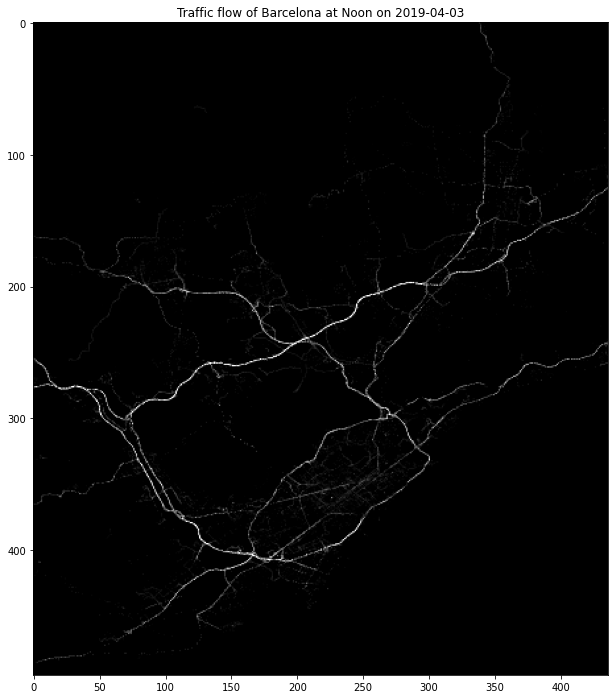

In [14]:
#rows = len(cities)
#rows = 1
#cols = 1
scale_factor = 12

#for i, city in enumerate(cities):
#    third_apr = load_h5_file(f"{BASE_FOLDER}/{city}/training/2019-04-03_{city}_8ch_aggregated.h5")
#    print(third_apr.shape)
#    map_at_noon = third_apr[12].sum(axis=(-1))
#    axs[i].imshow(map_at_noon[0:495, 0:436], cmap="gray", vmin=0, vmax=255)

city = 'BARCELONA'

third_apr = load_h5_file(f"{BASE_FOLDER}/{city}/training/2019-04-03_{city}_8ch_aggregated.h5")
print(third_apr.shape)
map_at_noon = third_apr[11].sum(axis=(-1))
plt.figure(figsize=(scale_factor, scale_factor))
plt.title("Traffic flow of Barcelona at Noon on 2019-04-03")
plt.imshow(map_at_noon[0:495, 0:436], cmap="gray", vmin=0, vmax=255)

Loaded data has shape (24, 495, 436, 8) with dtype uint8 between 0 and 249
Reading pixel 212,246


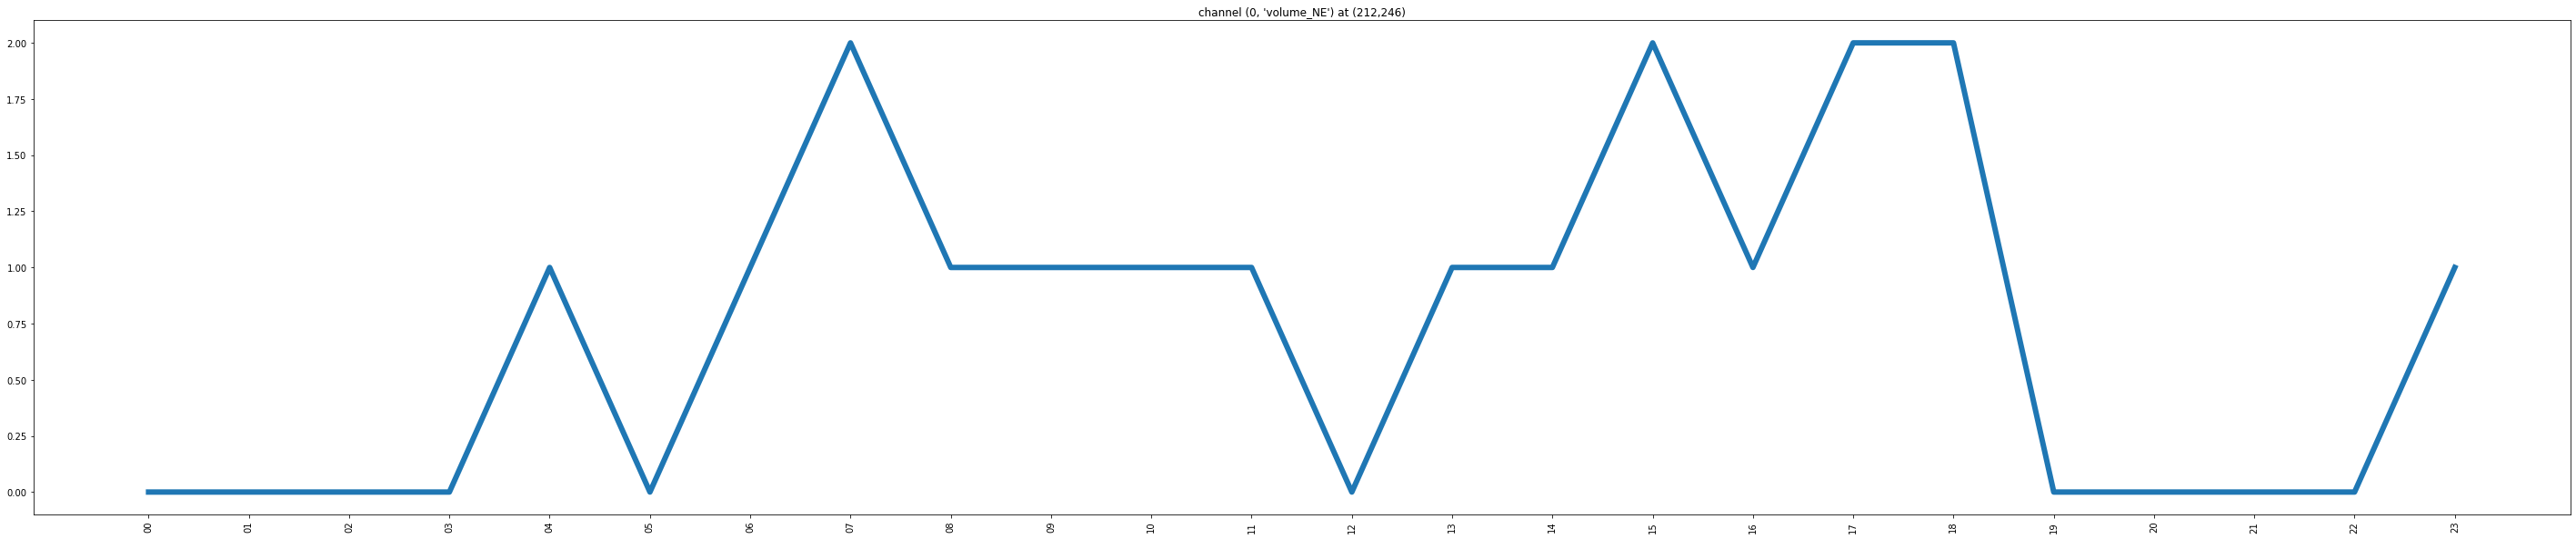

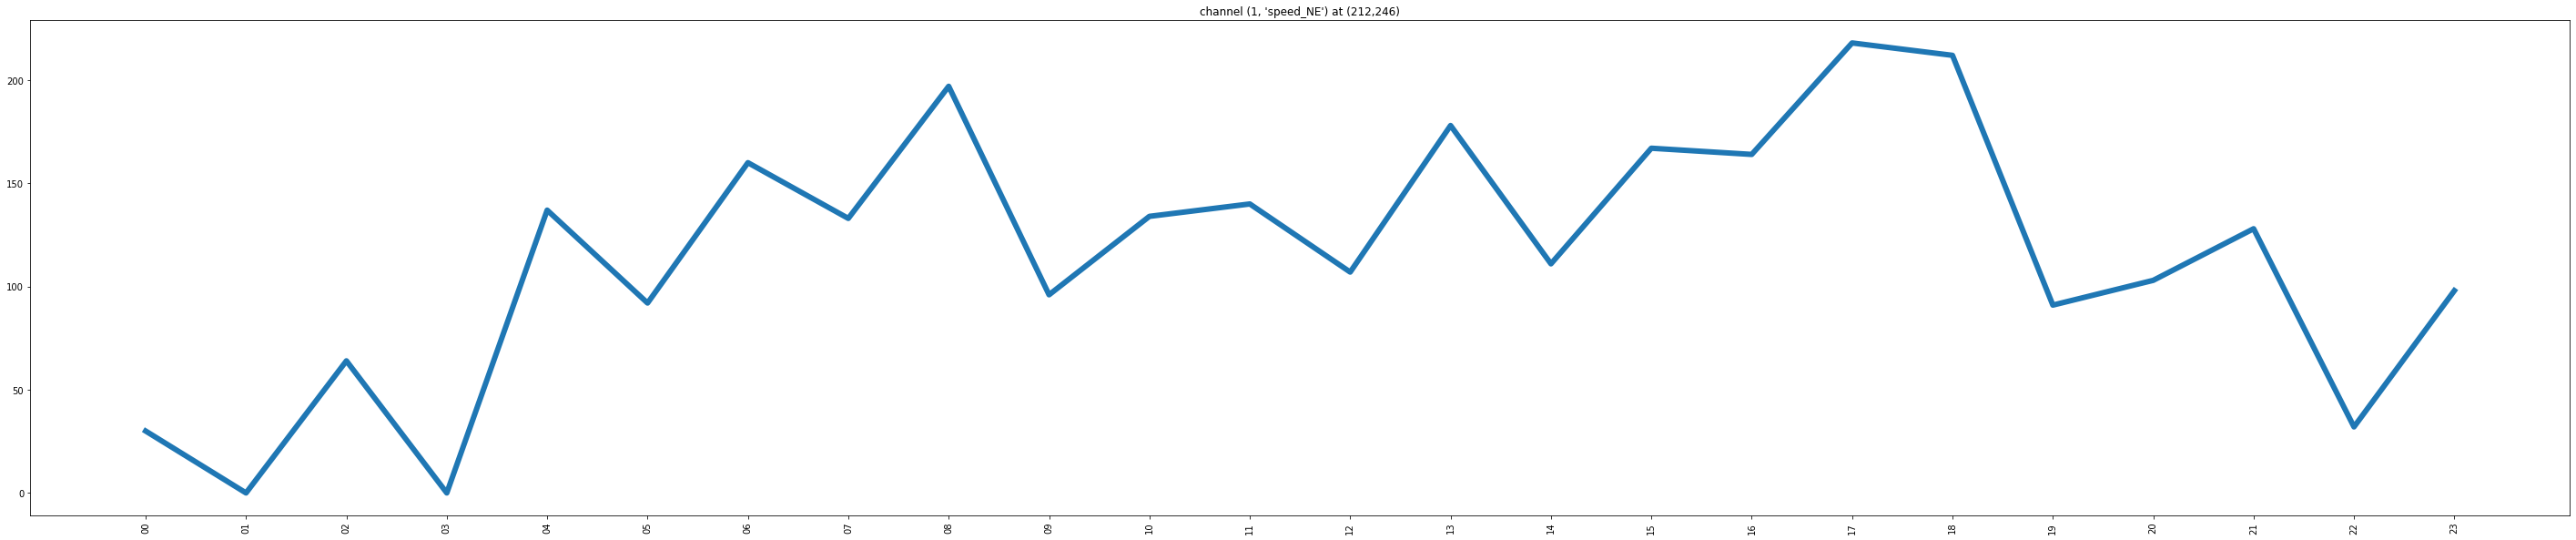

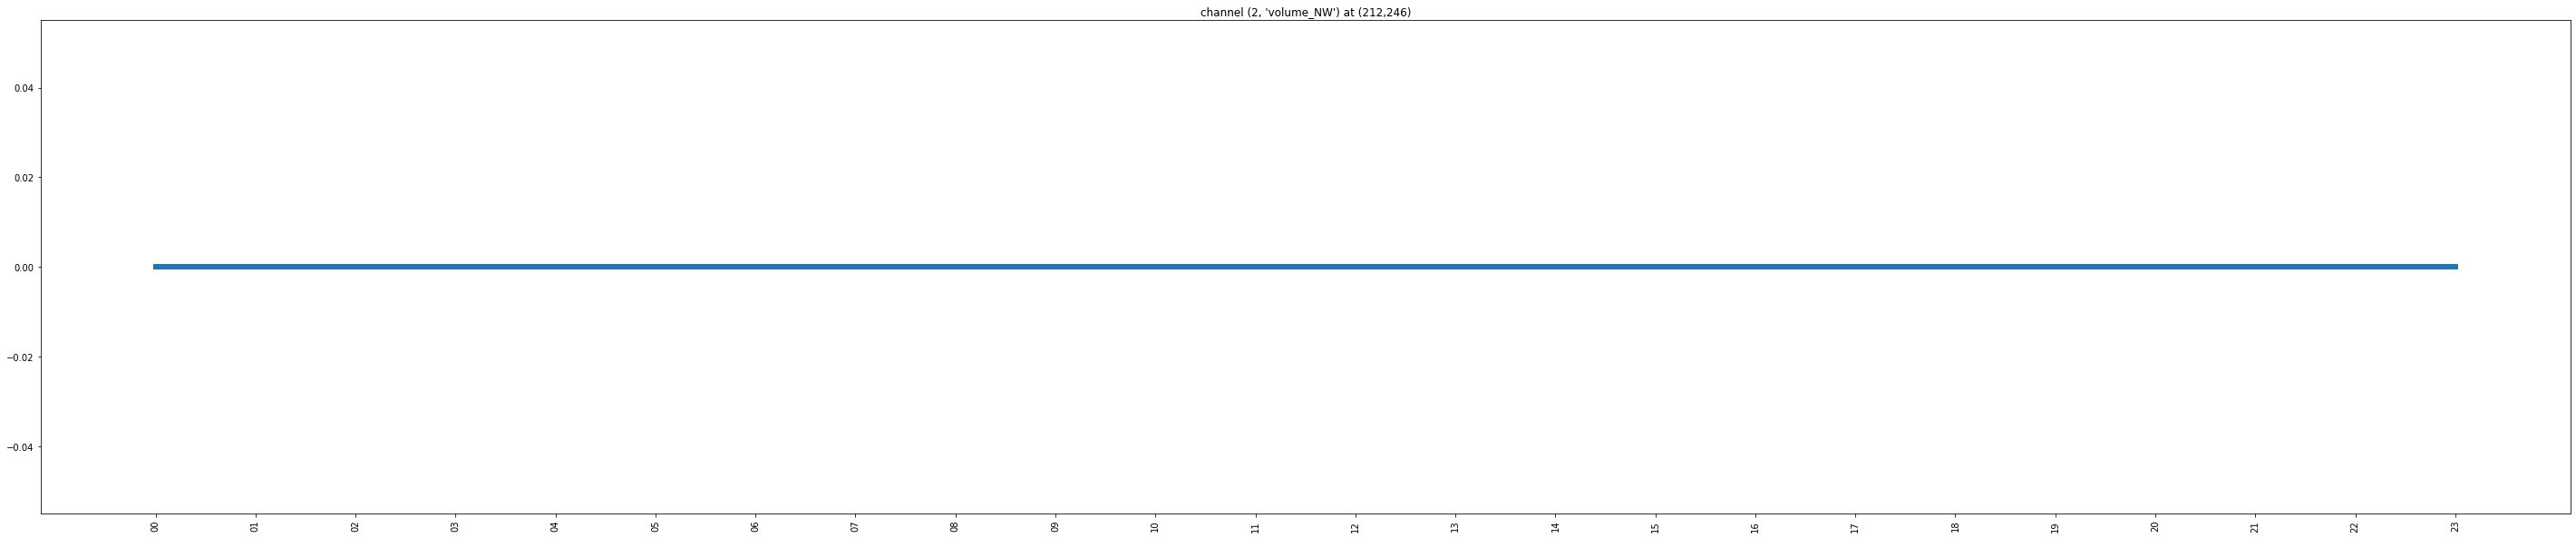

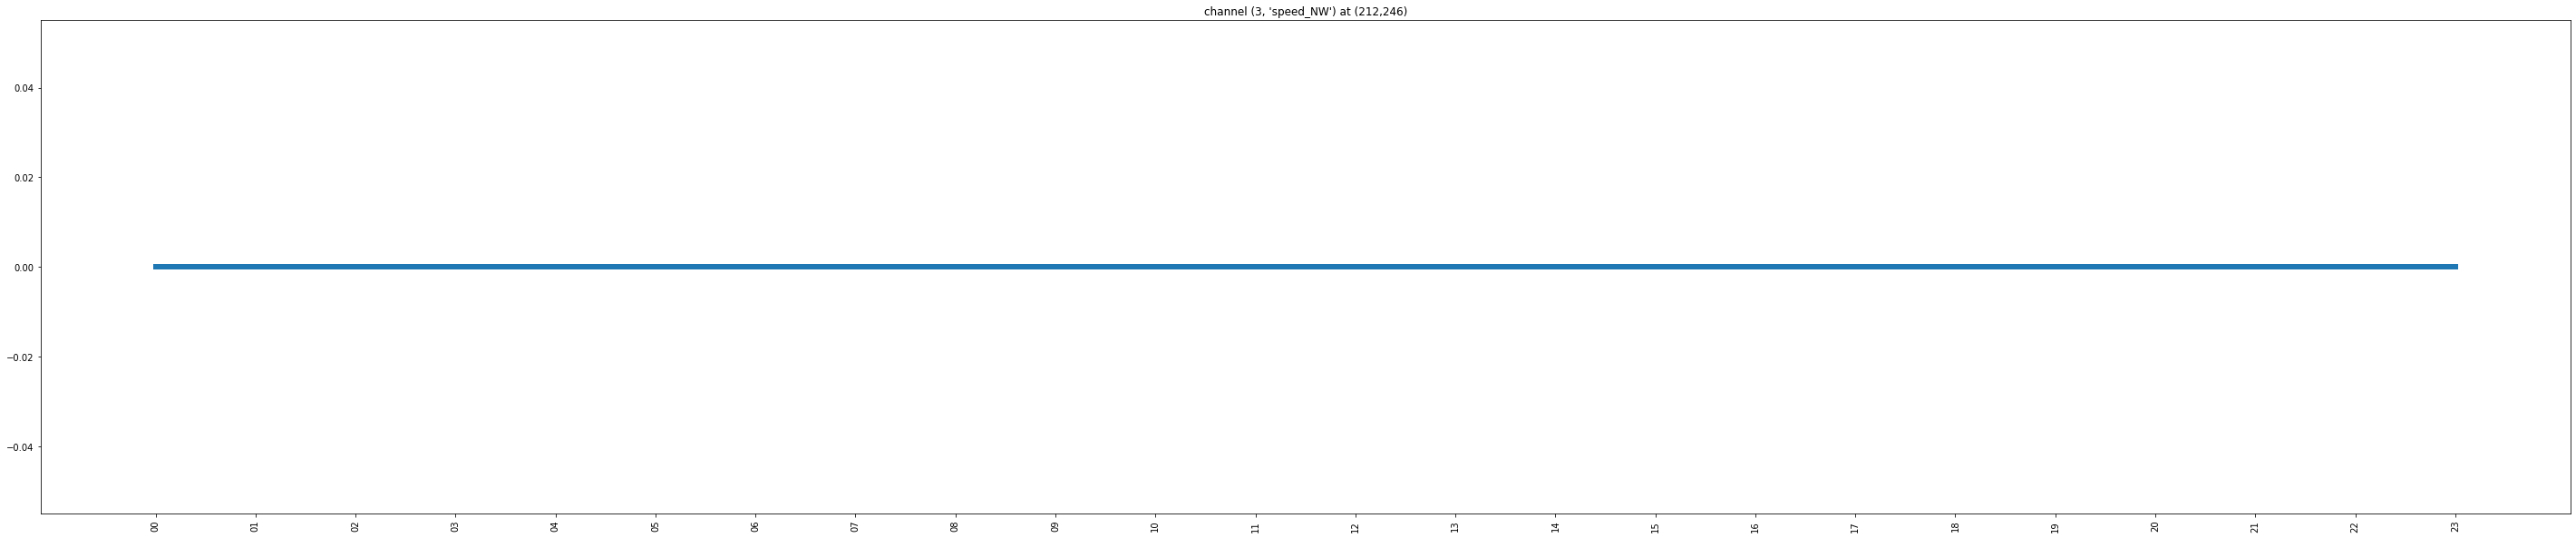

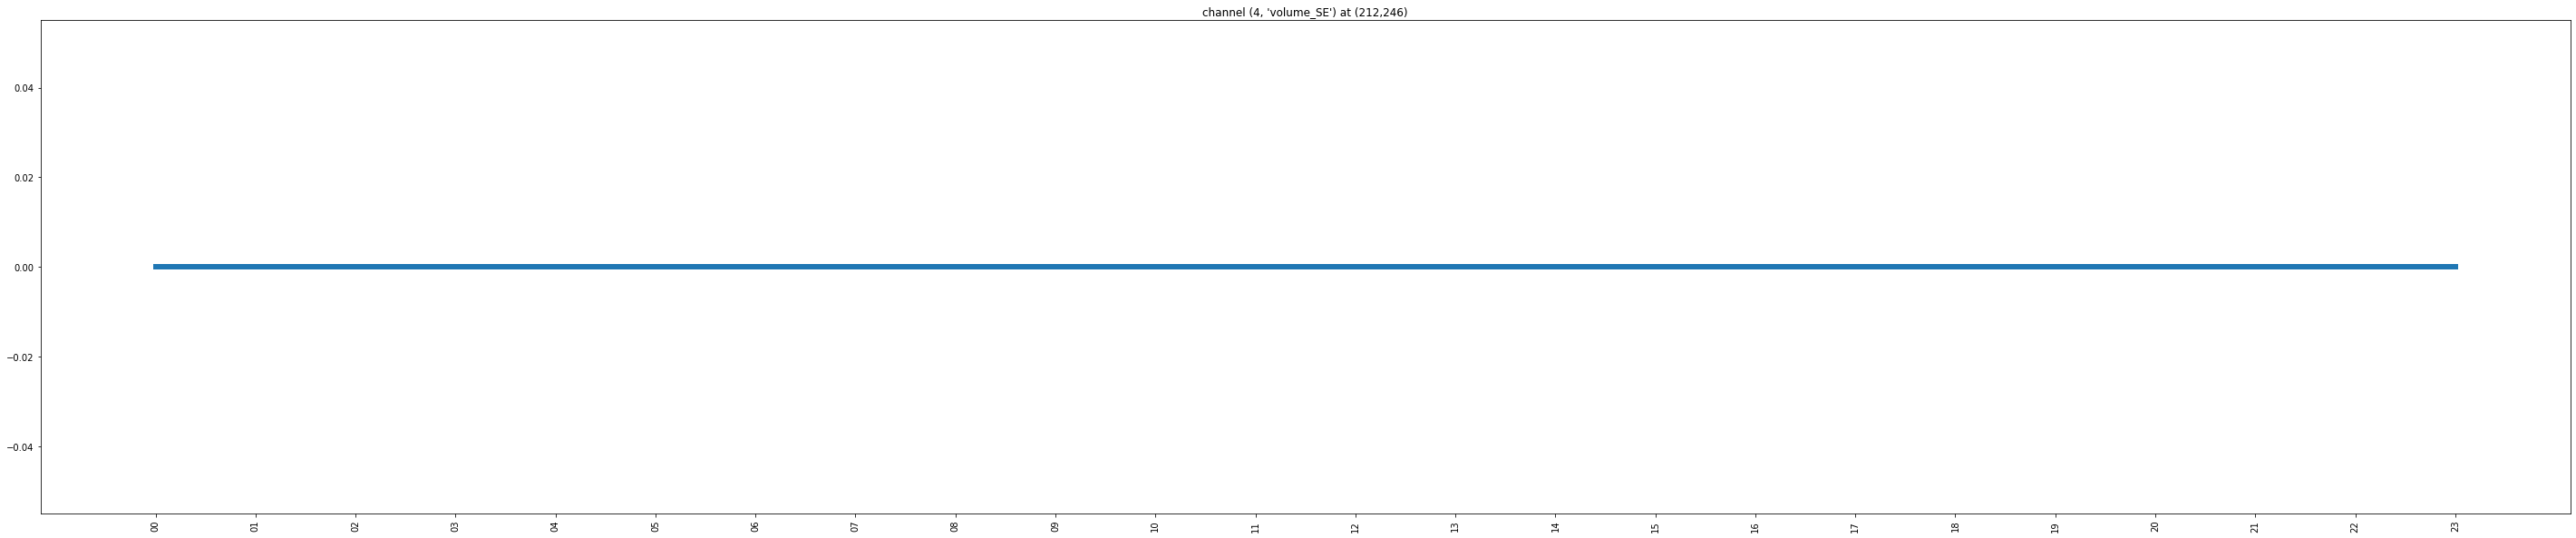

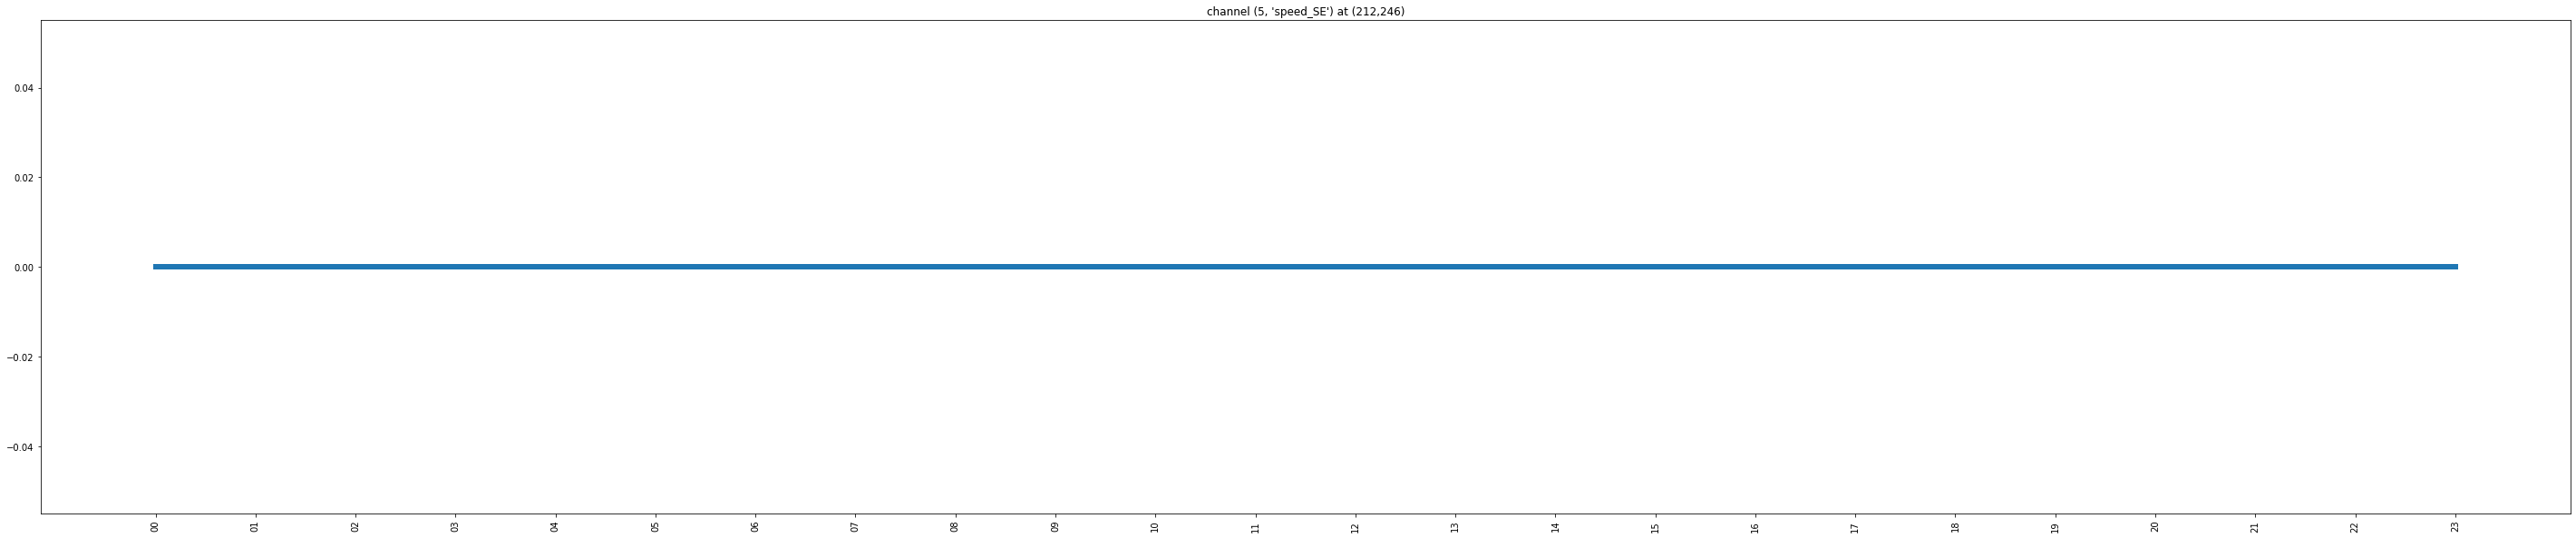

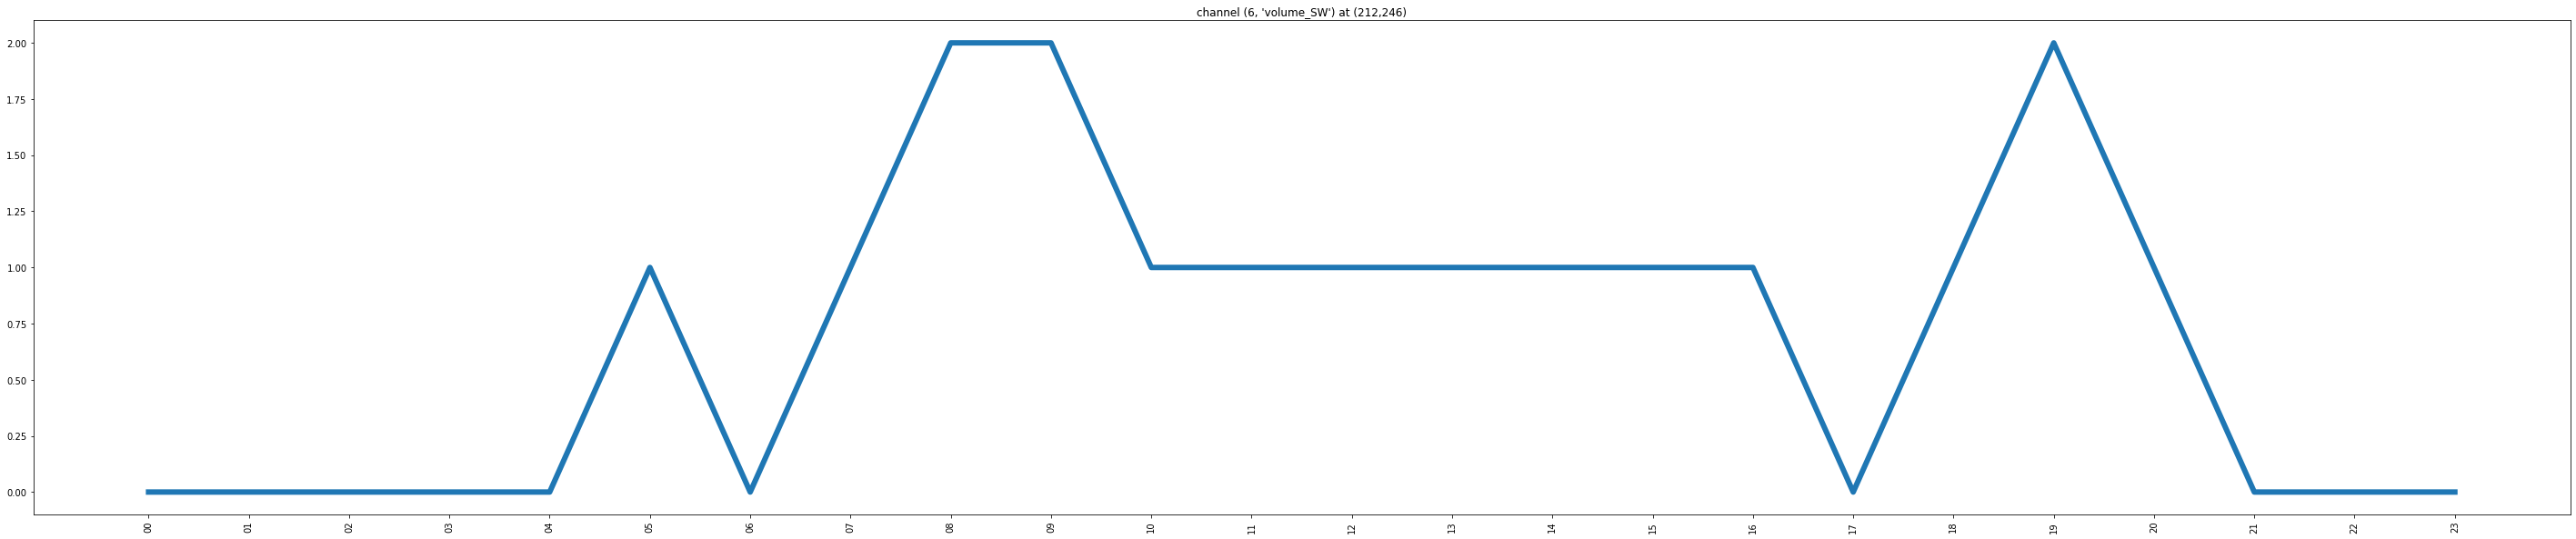

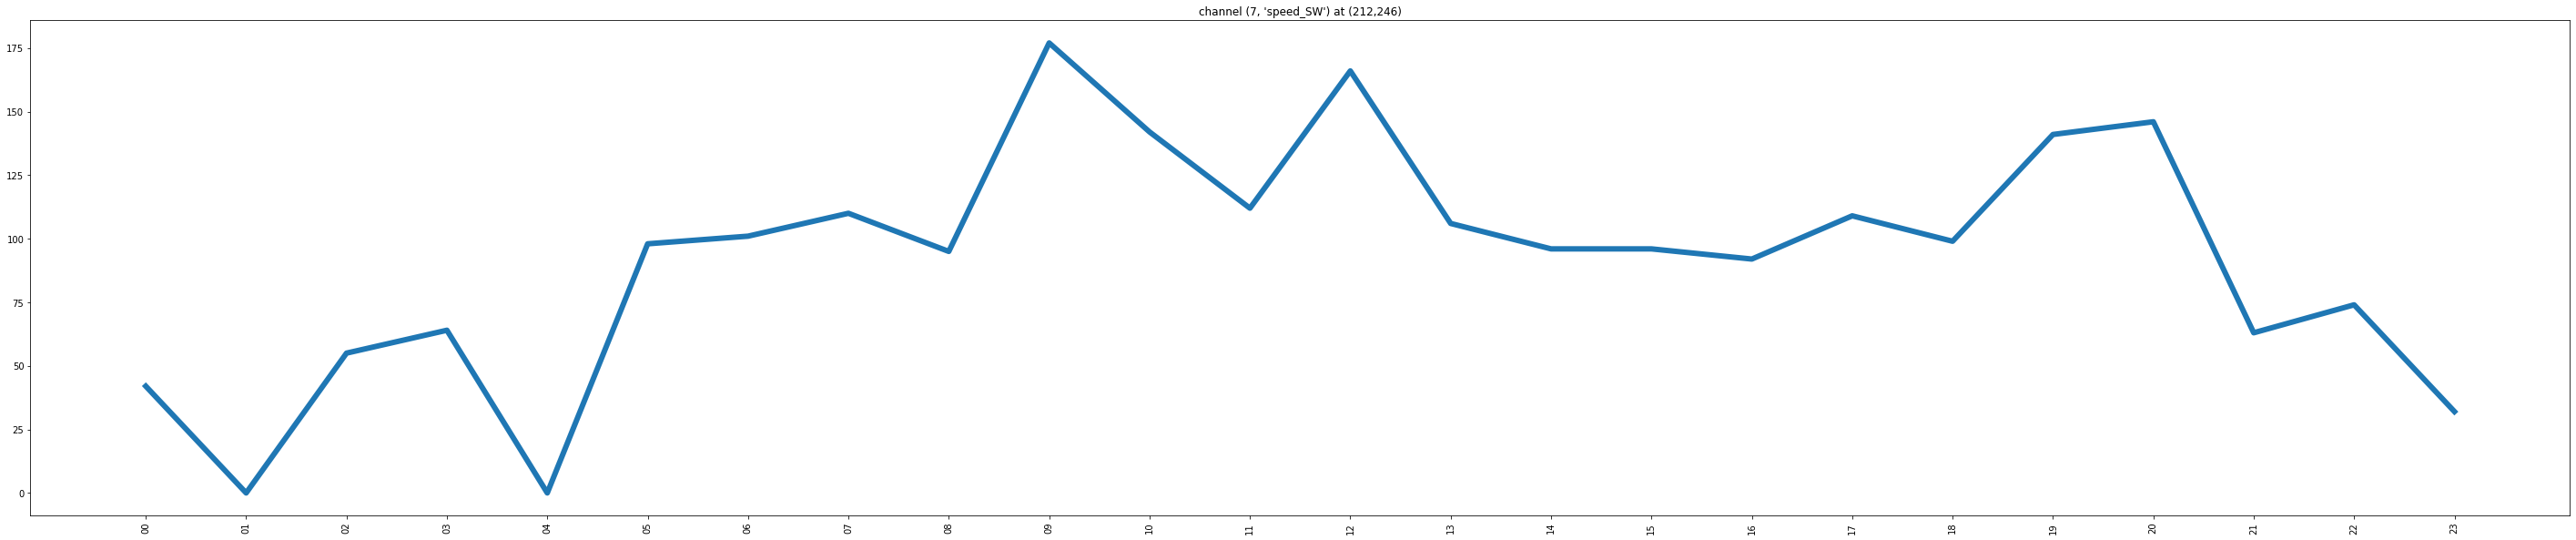

In [23]:
import datetime, os
rows = len(cities)
for city in cities:
    filename = f"{BASE_FOLDER}/{city}/training/2019-04-03_{city}_8ch_aggregated.h5"
    if os.path.isfile(filename):
        third_apr = load_h5_file(filename)
        print(f"Loaded data has shape {third_apr.shape} with dtype {third_apr.dtype} between {np.min(third_apr)} and {np.max(third_apr)}")

        dailysum = np.sum(third_apr, axis=(0))
        unravelled = np.unravel_index([np.argmax(dailysum[:, :, 1])], (495, 436))
        x = unravelled[0][0]
        y = unravelled[1][0]
        print(f"Reading pixel {x},{y}")

        for ch in range(third_apr.shape[3]):
            plt.figure(figsize=(50, 10))
            plt.title(f"channel {channels[ch]} at ({x},{y})")
            x_labels = [datetime.time(hour=t).isoformat(timespec="hours") for t in range(24)]
            plt.plot(x_labels, third_apr[:, x, y, ch], linewidth=6)
            plt.xticks(rotation=90)
            plt.show()